In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import os, sys

sys.path.insert(0, "../")
from utils_local import plot_utils

#from global_config import config
import matplotlib.pyplot as plt

Text(85.72222222222219, 0.5, '$\\mathcal{R}_H=\\beta/(\\tau+\\delta)$')

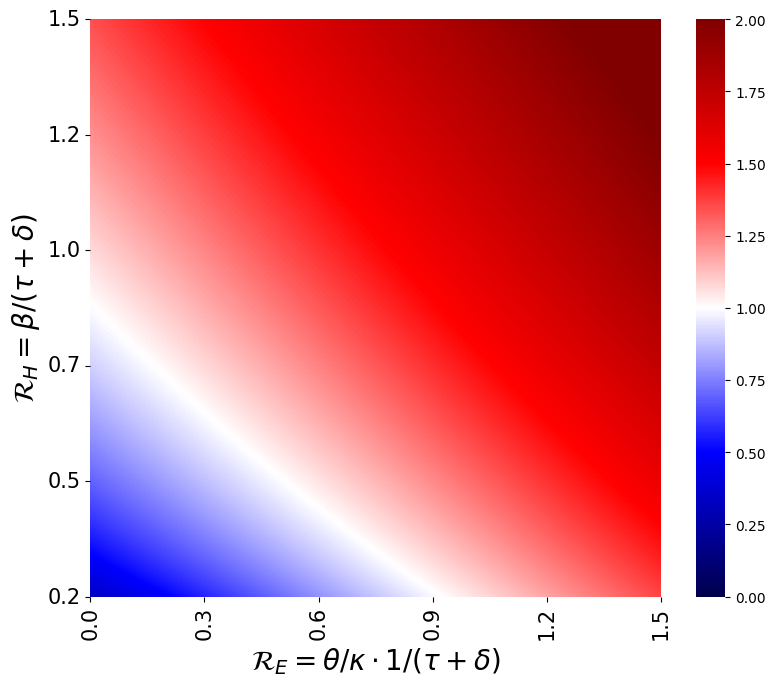

In [2]:
Rh = np.linspace(0.2,   1.5, 1000)
Re = np.linspace(0.001, 1.5, 1000)

R1, R2 = np.meshgrid(Rh, Re)

R0          = (1/2) * R1 + np.sqrt(R2 + (1/4) * R1)
rho_norm_df = pd.DataFrame(R0, index=Rh, columns=Re)


palette = sns.color_palette("seismic", as_cmap=True)

fig, ax = plt.subplots(1, 1, figsize=(9.2, 7.5), sharey="col", sharex="col")
sns.heatmap(ax = ax, data=rho_norm_df.iloc[::-1], cmap=palette,  cbar=True, vmin=0.0, vmax=2)

xticks        = rho_norm_df.columns
keptxticksidx = np.linspace(0,len(xticks),6)
xtickslabels  = list(xticks[ np.maximum(keptxticksidx.astype(int)-1,0) ])
xtickslabels  = ['{:.1f}'.format(l) for l in xtickslabels]

yticks         = rho_norm_df.iloc[::-1].index
keptyticksidx  = np.linspace(0,len(yticks),6)
ytickslabels   = list(yticks[ np.maximum(keptyticksidx.astype(int)-1,0) ])
ytickslabels   = ['{:.1f}'.format(l) for l in ytickslabels]

ax.set_xticks(keptxticksidx)
ax.set_yticks(keptyticksidx)

ax.set_xticklabels(xtickslabels, fontsize=20, rotation=0)
ax.set_yticklabels(ytickslabels, fontsize=20)

ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax.tick_params( which='both', axis='both', labelsize=15)

ax.set_xlabel(r"$\mathcal{R}_E=\theta/\kappa \cdot 1/(\tau+\delta)$", fontsize=20)
ax.set_ylabel(r"$\mathcal{R}_H=\beta/(\tau+\delta)$", fontsize=20)


Text(0.5, 0.01, '$\\mathcal{R}_H=\\beta/(\\tau+\\delta)$')

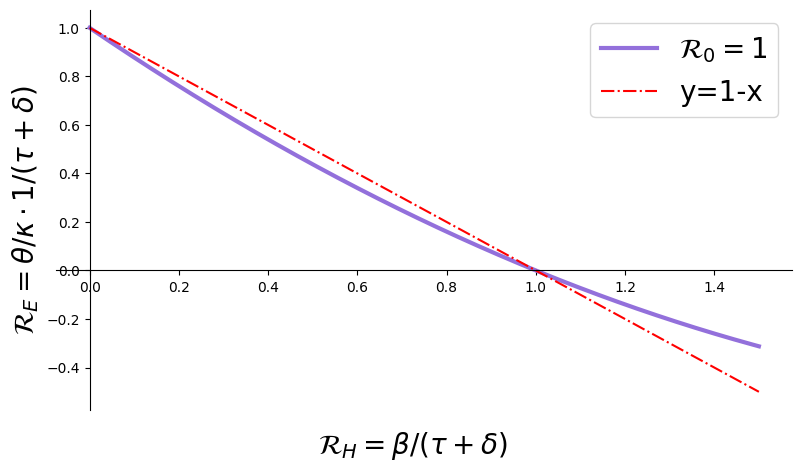

In [3]:


import sympy as sp

# Define symbols.
R1, R2 = sp.symbols('R1 R2')


eq1 = sp.Eq(1, (1/2) * R1 + sp.sqrt(R2 + (1/4) * R1))
Fr2 = sp.simplify(sp.solve(eq1, R2)[0])

r1 = np.linspace(0, 1.5, 1000)
r2 = 0.25 * r1**2 - 1.25* r1 +1

fig, ax = plt.subplots(1, 1, figsize=(9.5, 5.2), sharey="col", sharex="col")

ax.plot(r1, r2, lw=3, color="mediumpurple", label=r"$\mathcal{R}_0=1$")
iden = np.linspace(0, 1.5,100)
ax.plot(iden, -iden+1, color="red", ls="-.", label="y=1-x")

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(fontsize=20)

ax.set_ylabel(r"$\mathcal{R}_E=\theta/\kappa \cdot 1/(\tau+\delta)$", fontsize=20)
fig.supxlabel(r"$\mathcal{R}_H=\beta/(\tau+\delta)$", fontsize=20)

Text(85.72222222222219, 0.5, '$\\mathcal{R}_H=\\beta$')

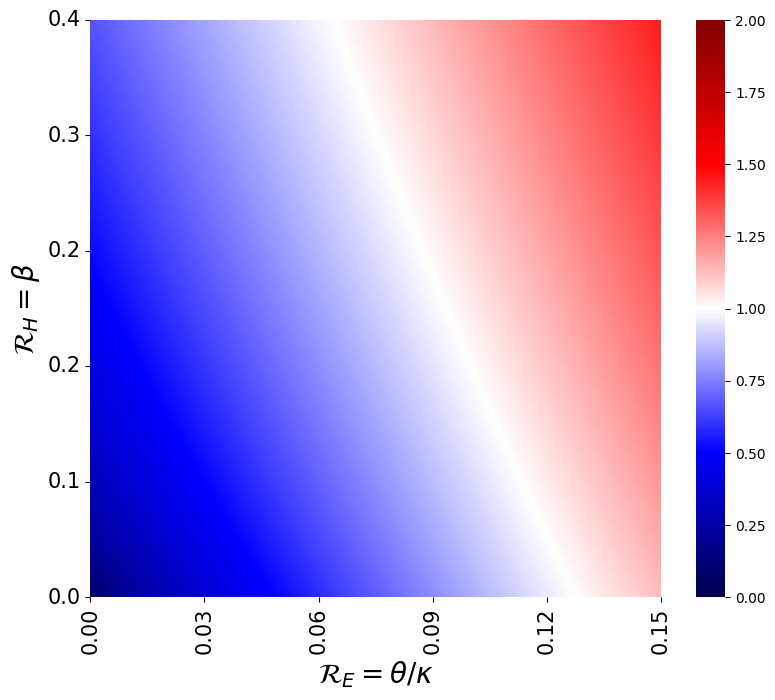

In [4]:
tau_plus_delta = (1/3 + 1/120)

beta           = np.linspace(0.001,   0.4, 1000)
teta_div_kappa = np.linspace(0.001, 0.15, 1000)

R1, R2 = np.meshgrid(beta, teta_div_kappa)

R0 = (1/2) * R1/tau_plus_delta + np.sqrt(R2/tau_plus_delta  + (1/4) * R1 / tau_plus_delta)
rho_norm_df = pd.DataFrame(R0, index=beta, columns=teta_div_kappa)

palette = sns.color_palette("seismic", as_cmap=True)

fig, ax = plt.subplots(1, 1, figsize=(9.2, 7.5), sharey="col", sharex="col")
sns.heatmap(ax = ax, data=rho_norm_df.iloc[::-1], cmap=palette,  cbar=True, vmin=0.0, vmax=2)

xticks        = rho_norm_df.columns
keptxticksidx = np.linspace(0,len(xticks),6)
xtickslabels  = list(xticks[ np.maximum(keptxticksidx.astype(int)-1,0) ])
xtickslabels  = ['{:.2f}'.format(l) for l in xtickslabels]

yticks         = rho_norm_df.iloc[::-1].index
keptyticksidx  = np.linspace(0,len(yticks),6)
ytickslabels   = list(yticks[ np.maximum(keptyticksidx.astype(int)-1,0) ])
ytickslabels   = ['{:.1f}'.format(l) for l in ytickslabels]

ax.set_xticks(keptxticksidx)
ax.set_yticks(keptyticksidx)

ax.set_xticklabels(xtickslabels, fontsize=20, rotation=0)
ax.set_yticklabels(ytickslabels, fontsize=20)

ax.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax.tick_params( which='both', axis='both', labelsize=15)

ax.set_xlabel(r"$\mathcal{R}_E=\theta/\kappa $", fontsize=20)
ax.set_ylabel(r"$\mathcal{R}_H=\beta$", fontsize=20)
